In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

from data_helpers.pre_data import look_for_nan
from data_helpers.pre_data import info
from utils.plot_settings import plot_setting


In [2]:
plot_setting()
df = pd.read_csv('../../data/cumulative-installed-wind-energy-capacity-gigawatts.csv')

## Data Description

In [3]:
look_for_nan(df)

------------------------------------
File containd NaN-values: True
------------------------------------


In [4]:
df.head()

,Entity,Code,Year,Wind energy capacity
0,Afghanistan,AFG,2012,0.0001
1,Afghanistan,AFG,2013,0.0001
2,Afghanistan,AFG,2014,0.0001
3,Afghanistan,AFG,2015,0.0001
4,Afghanistan,AFG,2016,0.0001


In [5]:
info(df, 'Wind energy capacity')

Column names: Index(['Entity', 'Code', 'Year', 'Wind energy capacity'], dtype='object')
---------------------------
	Description
---------------------------
count    3059.000000
mean       12.156302
std        52.871058
min         0.000000
25%         0.002400
50%         0.069955
75%         1.508744
max       898.824250
Name: Wind energy capacity, dtype: float64


**Entity**: country (categirical)

**Code**: Country code (categorical)

**Year**: (numerical)

**Wind energy capacity**: energy generated from wind, measured in terawatt-hours (numerical)

<Axes: xlabel='Wind energy capacity', ylabel='Density'>

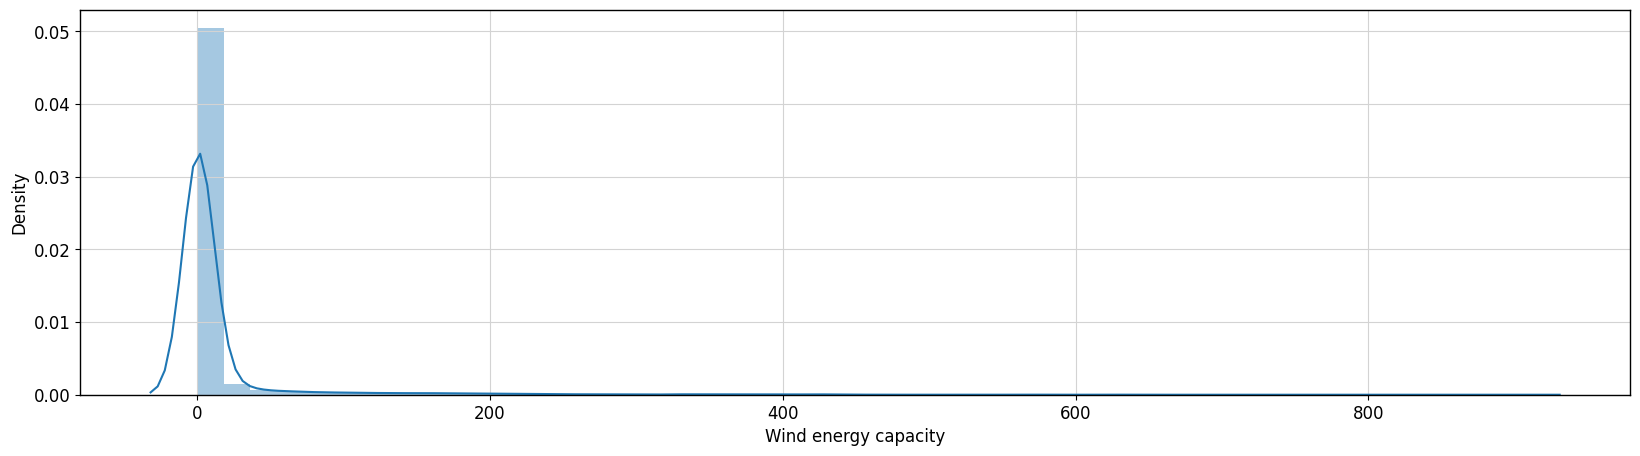

In [17]:
sns.distplot(df['Wind energy capacity'])

In [6]:
entity_mean = df.groupby('Entity')['Wind energy capacity'].mean().reset_index()

<Axes: xlabel='Wind energy capacity', ylabel='Density'>

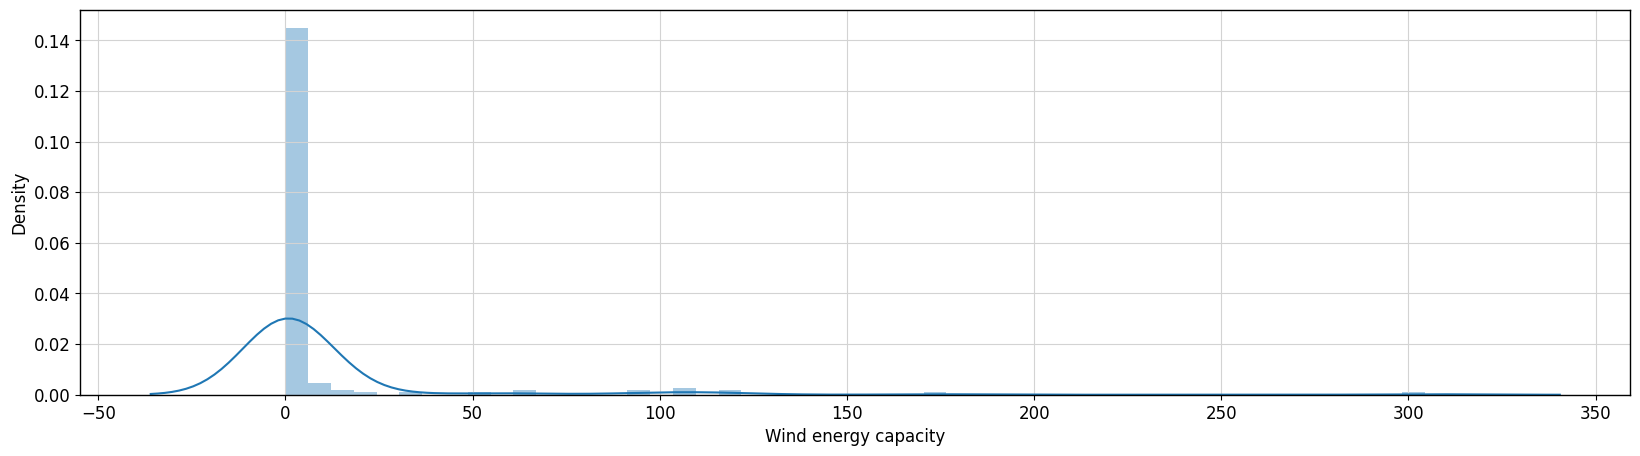

In [16]:
sns.distplot(entity_mean['Wind energy capacity'])

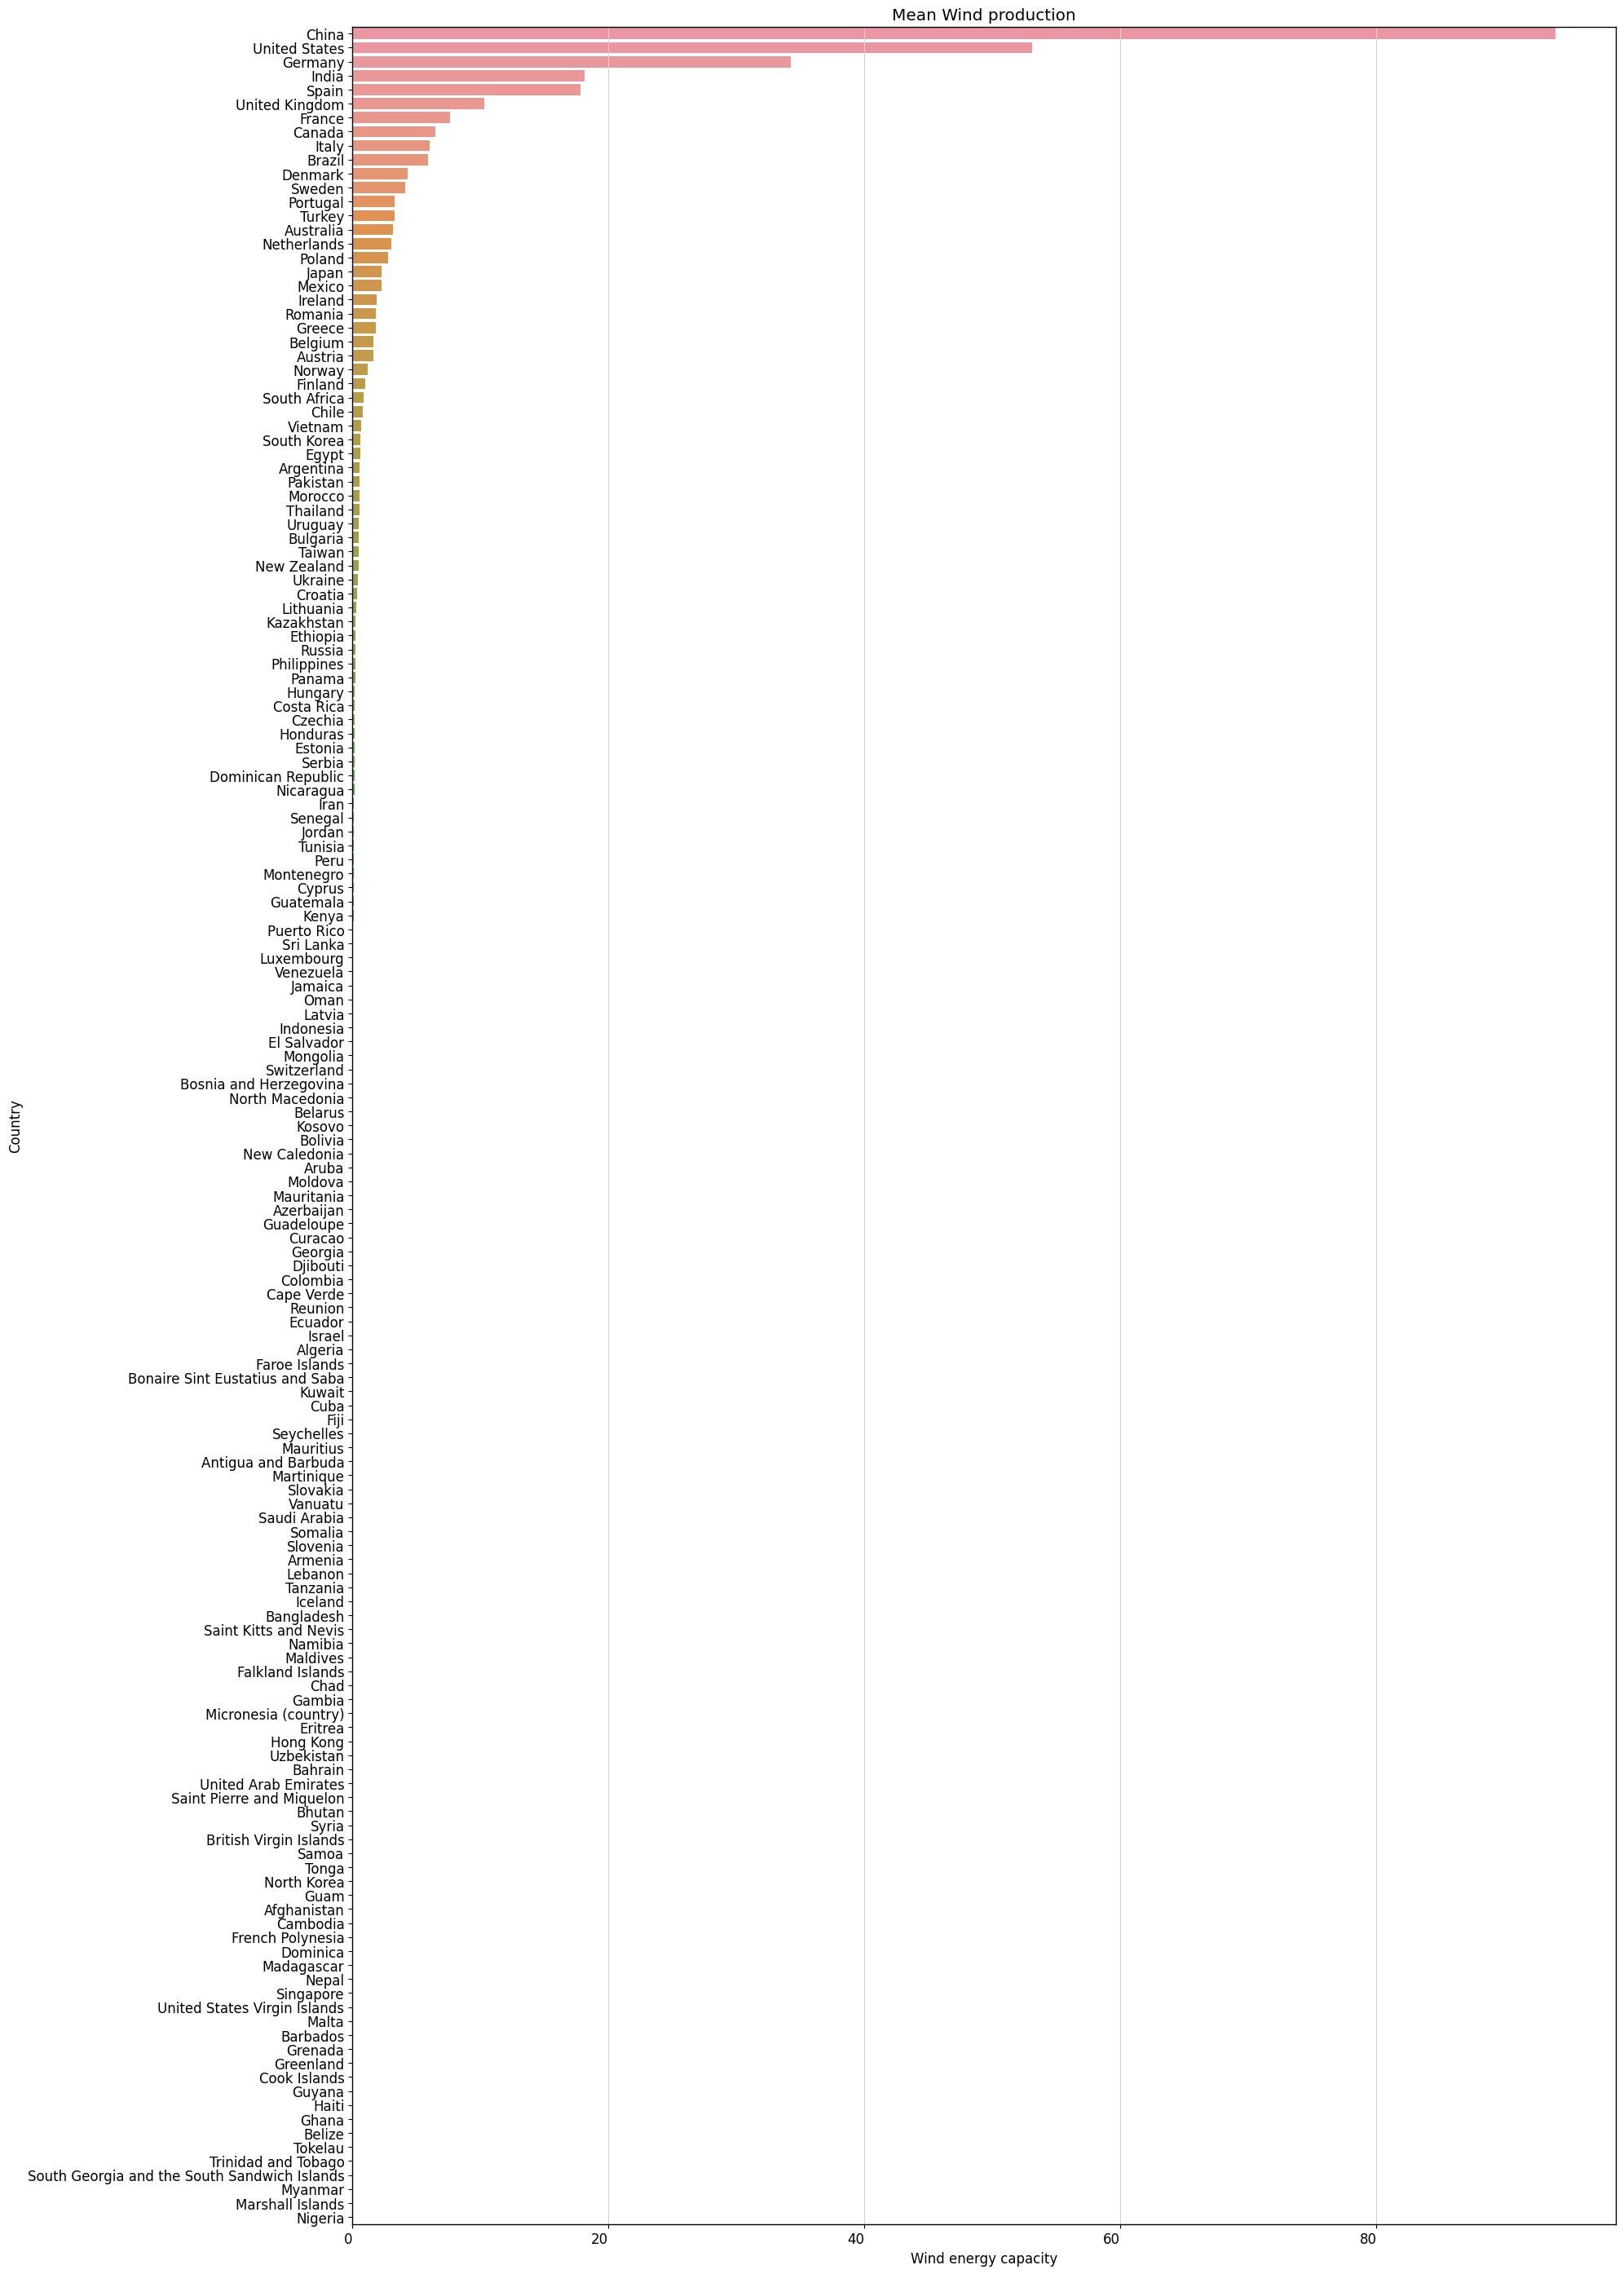

In [29]:
subset_df = df.dropna(subset=['Code'])
subset_df = subset_df[subset_df['Entity'].str.strip() != 'World']
country_sub_df = subset_df.groupby('Entity')['Wind energy capacity'].mean().reset_index()
sorted_subset = country_sub_df.sort_values(by='Wind energy capacity', ascending=False)
f, ax = plt.subplots(figsize=(20, 35))
fig = sns.barplot(x='Wind energy capacity', y='Entity', data=sorted_subset, ci=None)
fig.set(xlabel='Wind energy capacity', ylabel='Country', title='Mean Wind production')
fig.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right')
#plt.tight_layout()
plt.show()